Developer: Akhilesh Paspureddi, 
Project : RL agenet for cartpool 

In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation
import os
import cv2 
import gym
import stable_baselines3 as PPO
import stable_baselines3.common.vec_env as DummyVecEnv
import stable_baselines3.common.evaluation as evaluate_policy

In [2]:
np.bool8 = np.bool_

In [3]:
environment_name = 'CartPole-v0'
env = gym.make(environment_name)

/opt/anaconda3/envs/akhilp_env/lib/python3.9/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


In [4]:
episodes = 5
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        env.render()
        action = env.action_space.sample()
        n_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
env.close()

Episode:1 Score:28.0
Episode:2 Score:46.0
Episode:3 Score:17.0
Episode:4 Score:30.0
Episode:5 Score:43.0


/opt/anaconda3/envs/akhilp_env/lib/python3.9/site-packages/gym/envs/classic_control/cartpole.py:211: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("CartPole-v0", render_mode="rgb_array")
  gym.logger.warn(


In [5]:
env.close()

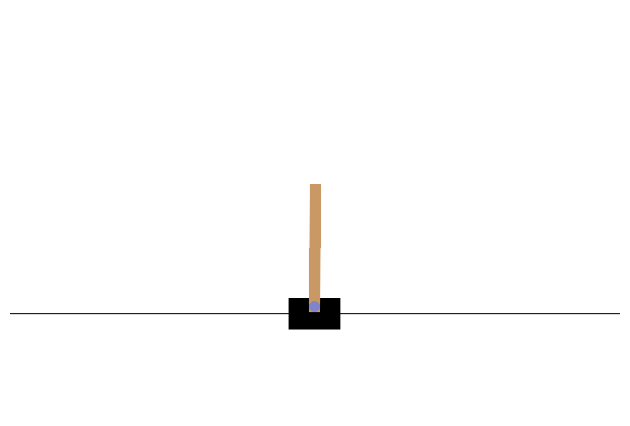

In [ ]:


# Create the environment with a render mode that returns RGB arrays.
# Note: Adjust render_mode according to your gym version (e.g. "rgb_array")
env = gym.make("CartPole-v1", render_mode="rgb_array")
state, info = env.reset()
frames = []

done = False
while not done:
    # Render returns a frame as an RGB array.
    frame = env.render()
    frames.append(frame)
    
    # Sample a random action
    action = env.action_space.sample()
    
    # Gym API now returns terminated and truncated flags separately.
    state, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

env.close()

# Create a Matplotlib animation to playback the collected frames.
fig, ax = plt.subplots()
im = ax.imshow(frames[0])
ax.axis('off')  # Turn off axis for a cleaner display

def update(frame):
    im.set_array(frame)
    return [im]

# Adjust "interval" (in milliseconds) for smoothness.
anim = FuncAnimation(fig, update, frames=frames, interval=50, blit=False)
plt.tight_layout()
plt.show()


In [15]:
frames[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [24]:
action = env.action_space.sample()
env.step(action)

/opt/anaconda3/envs/akhilp_env/lib/python3.9/site-packages/gym/envs/classic_control/cartpole.py:177: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior.
  logger.warn(


(array([ 0.17223278,  1.1709985 , -0.26632652, -2.0713909 ], dtype=float32),
 0.0,
 True,
 False,
 {})

In [22]:
env.observation_space.sample()

array([ 7.8476131e-01, -2.9198806e+38, -6.5350145e-02, -1.9897510e+38],
      dtype=float32)